# Gender identification through vocal characteristics

## Module Installation and Importation

In [1]:
!pip install mglearn
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
!pip install seaborn mglearn numpy pandas tensorflow matplotlib

## Bringing in the dataset

In [4]:
dataset = pd.read_csv('gender_voice_dataset.csv')
dataset= pd.DataFrame(dataset)
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
dataset.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Summarizing the dataset

In [6]:
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


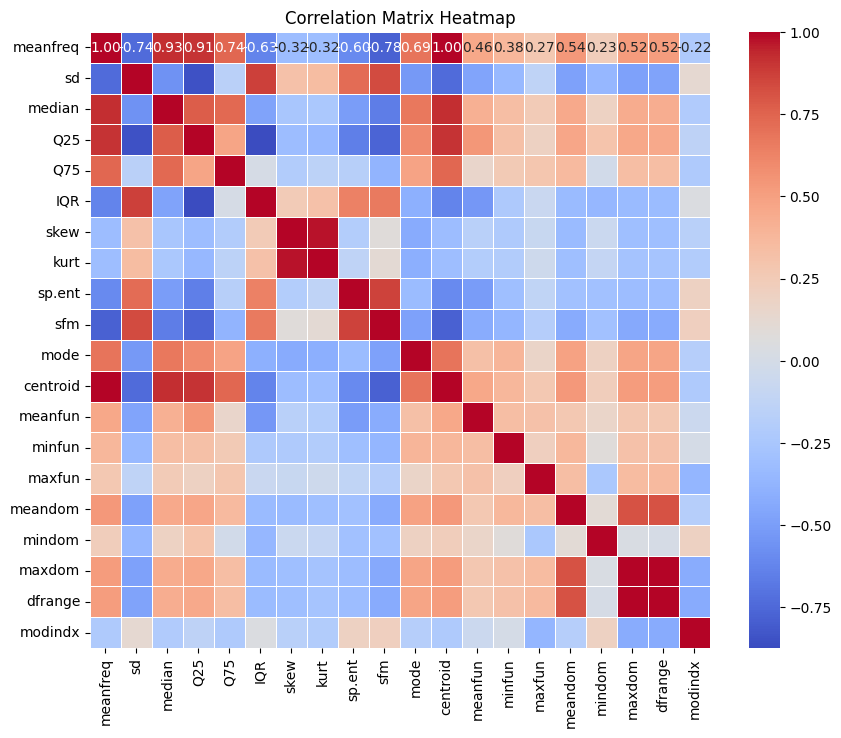

In [7]:
numeric_data = dataset.select_dtypes(include='number')

# Calculate the correlation matrix
corr = numeric_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

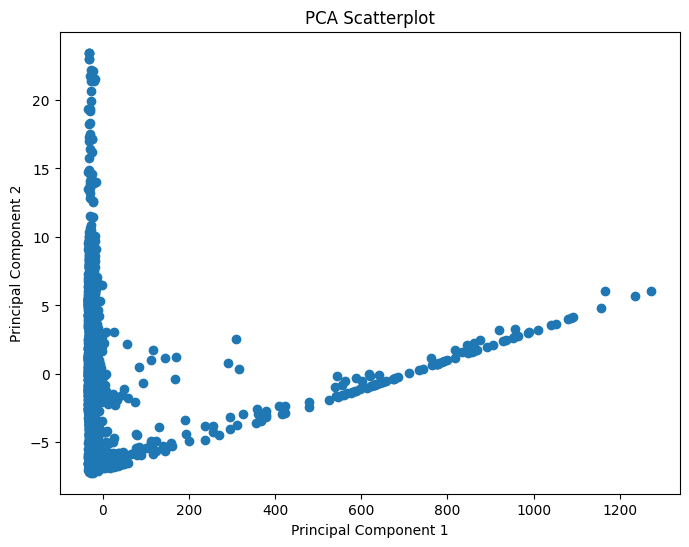

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot')
plt.show()

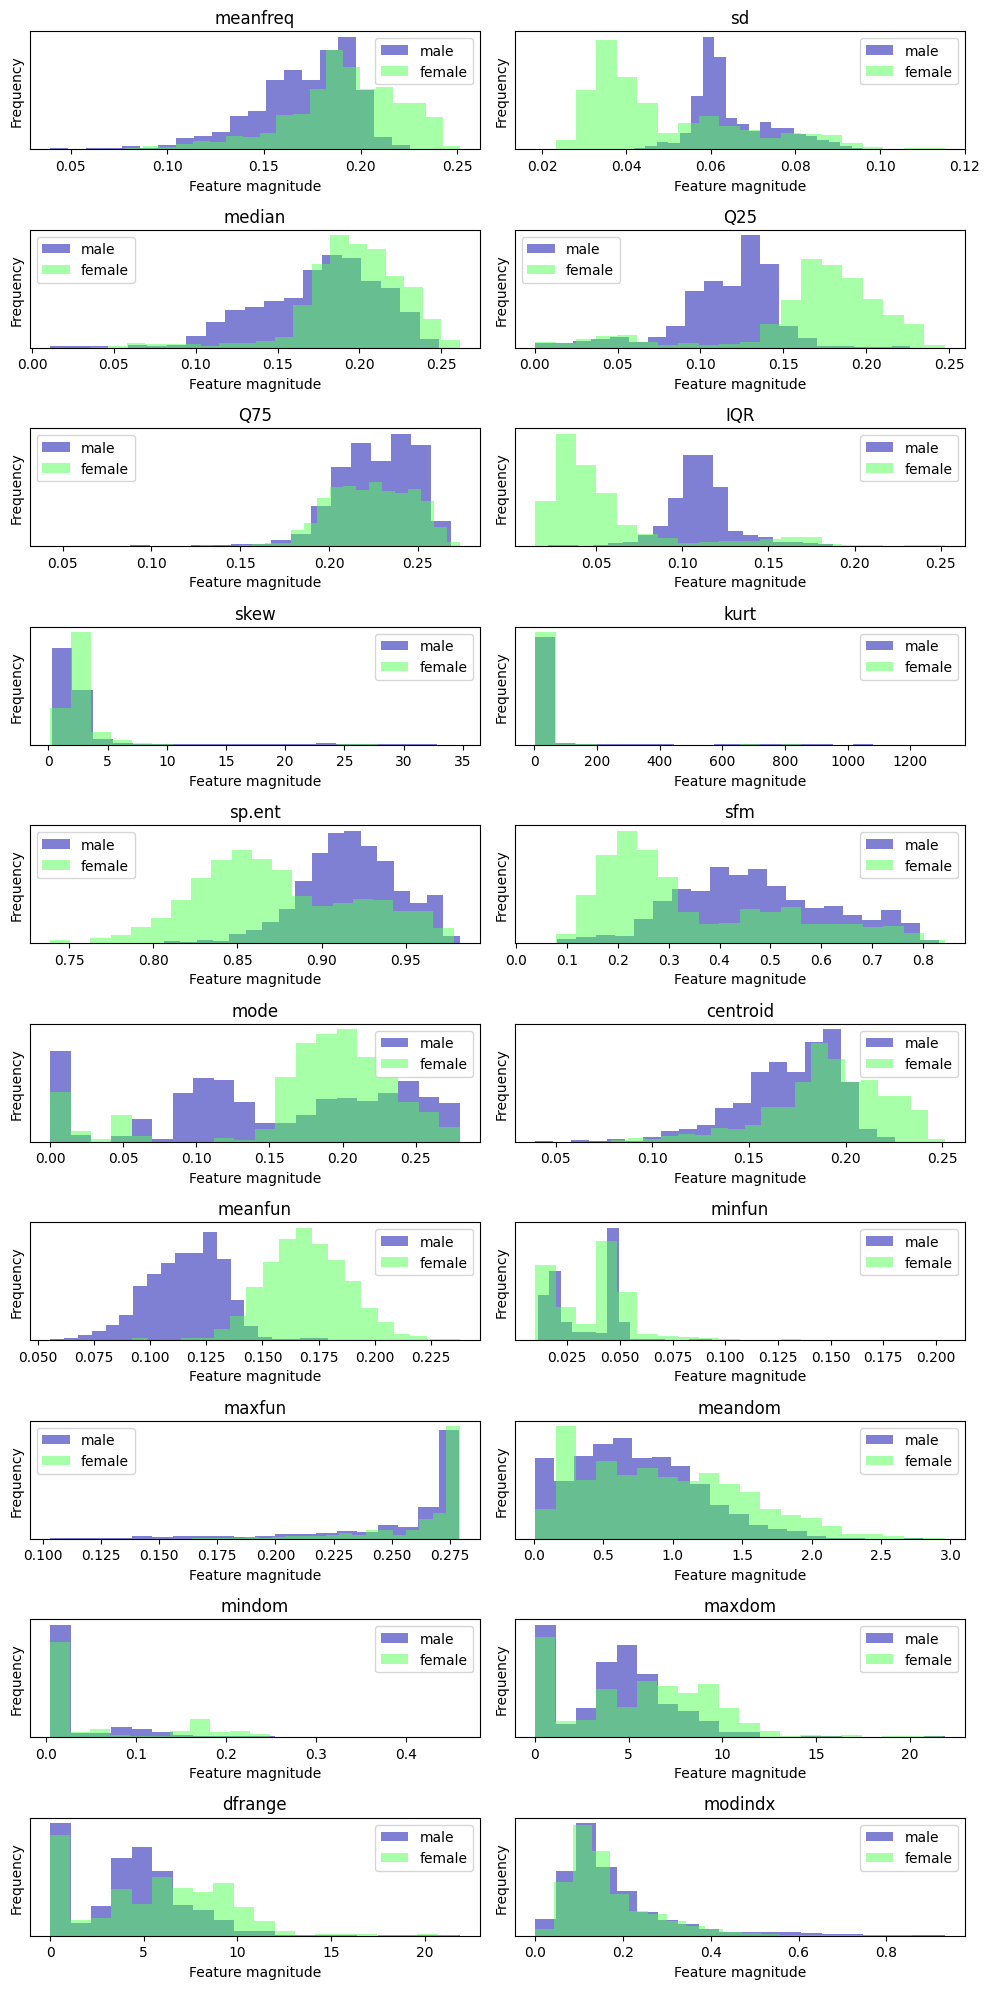

In [9]:
#Plot the histograms
male = dataset.loc[dataset['label']=='male']
female = dataset.loc[dataset['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

## Preprocessing the Dataset

In [10]:
# Droping the unwanted feature for accuracy
dataset_new = dataset.drop(['dfrange'], axis = 1)

In [11]:
dataset_new.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male


In [12]:
X = dataset_new.iloc[:,:-1].values
y = dataset_new.iloc[:, -1].values

In [13]:
print(X)

[[0.05978099 0.06424127 0.03202691 ... 0.0078125  0.0078125  0.        ]
 [0.06600874 0.06731003 0.04022874 ... 0.0078125  0.0546875  0.05263158]
 [0.0773155  0.08382942 0.03671846 ... 0.0078125  0.015625   0.04651163]
 ...
 [0.14205626 0.09579843 0.18373124 ... 0.0078125  2.9375     0.19475862]
 [0.14365875 0.09062826 0.18497617 ... 0.0078125  3.59375    0.31100218]
 [0.16550895 0.09288354 0.18304392 ... 0.0078125  0.5546875  0.35      ]]


### Encoding, Splitting Dataset and Feature Scaling

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
num_features = dataset_new.shape[1]
print("Number of features in the dataset:", num_features)

Number of features in the dataset: 20


In [16]:
features_list = dataset_new.columns.tolist()
print("List of features in the dataset:", features_list)

List of features in the dataset: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx', 'label']


# Experiment - 01  With Different Learning Rates and Building of ANN
##### Predicting on Test Dataset
##### Displaying Accuracy and r2 scores

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix


In [18]:
# List of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Create empty lists to store accuracy and r2 score for each learning rate
accuracies = []
r2_scores = []
test_accuracies = [] 
training_histories = []

In [19]:
# Loop through each learning rate
for lr in learning_rates:
    # Create the model
    ann = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=19, activation='relu'),
        tf.keras.layers.Dense(units=8, activation='relu'),
        tf.keras.layers.Dense(units=5, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model with the current learning rate
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    # Train the model and store the training history
    history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

    # Evaluate the model on test data
    _, accuracy = ann.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    
    # Predict and calculate R2 score
    y_pred = ann.predict(X_test)
    r2 = r2_score(y_test, y_pred)  # Assuming you imported r2_score from sklearn.metrics
    r2_scores.append(r2)

    # Print accuracy and R2 score for the current learning rate
    print(f"Learning Rate: {lr}")
    print("Accuracy:", accuracy)
    print("R2 Score:", r2)
    print()

    # Store the training history for the current learning rate
    training_histories.append(history)




20/20 [==============================] - 0s 2ms/step
Learning Rate: 0.001
Accuracy: 0.9794952869415283
R2 Score: 0.9381448646261408

20/20 [==============================] - 0s 2ms/step
Learning Rate: 0.01
Accuracy: 0.9794952869415283
R2 Score: 0.9303916982610545

20/20 [==============================] - 0s 2ms/step
Learning Rate: 0.1
Accuracy: 0.9384858012199402
R2 Score: 0.7694496795363562

20/20 [==============================] - 0s 1ms/step
Learning Rate: 0.5
Accuracy: 0.4684542715549469
R2 Score: -0.03063601513072678

20/20 [==============================] - 0s 2ms/step
Learning Rate: 1.0
Accuracy: 0.5315457582473755
R2 Score: -0.027671226528938497



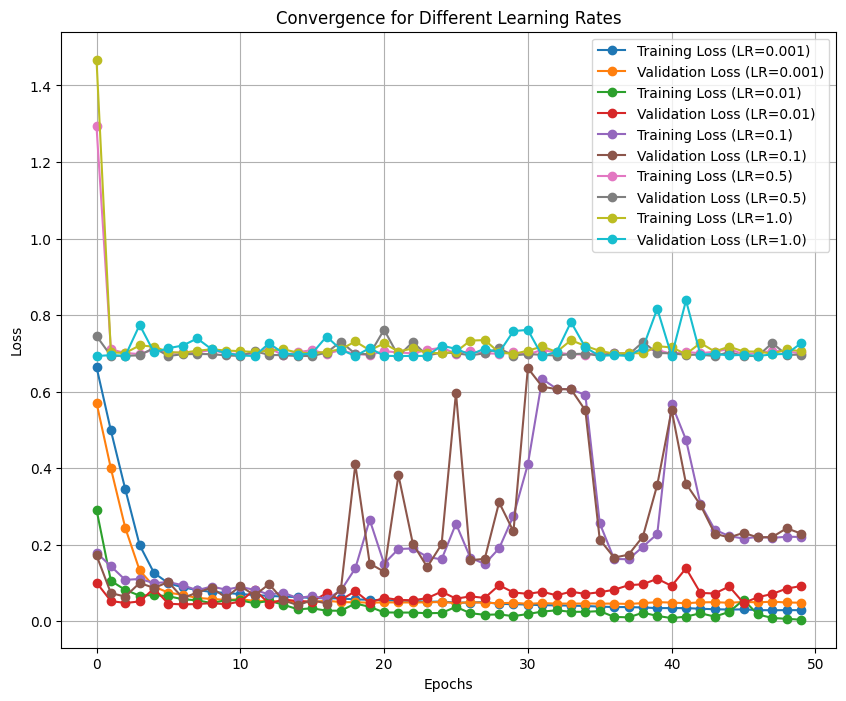

In [20]:
# Plot the convergence for different learning rates
plt.figure(figsize=(10, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Training Loss (LR={learning_rates[i]})', marker='o')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (LR={learning_rates[i]})', marker='o')

plt.title('Convergence for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Best Learning rate = 0.001

# Experiment-02, with different Batch_size 

In [21]:
lr = 0.001

20/20 [==============================] - 0s 2ms/step
Batch Size: 16
Accuracy: 0.9779179692268372
R2 Score: 0.9345635330360882

20/20 [==============================] - 0s 2ms/step
Batch Size: 32
Accuracy: 0.9794952869415283
R2 Score: 0.9287549277522885

20/20 [==============================] - 0s 2ms/step
Batch Size: 64
Accuracy: 0.9810725450515747
R2 Score: 0.942366626479465

20/20 [==============================] - 0s 1ms/step
Batch Size: 128
Accuracy: 0.9826498627662659
R2 Score: 0.9347741523460839



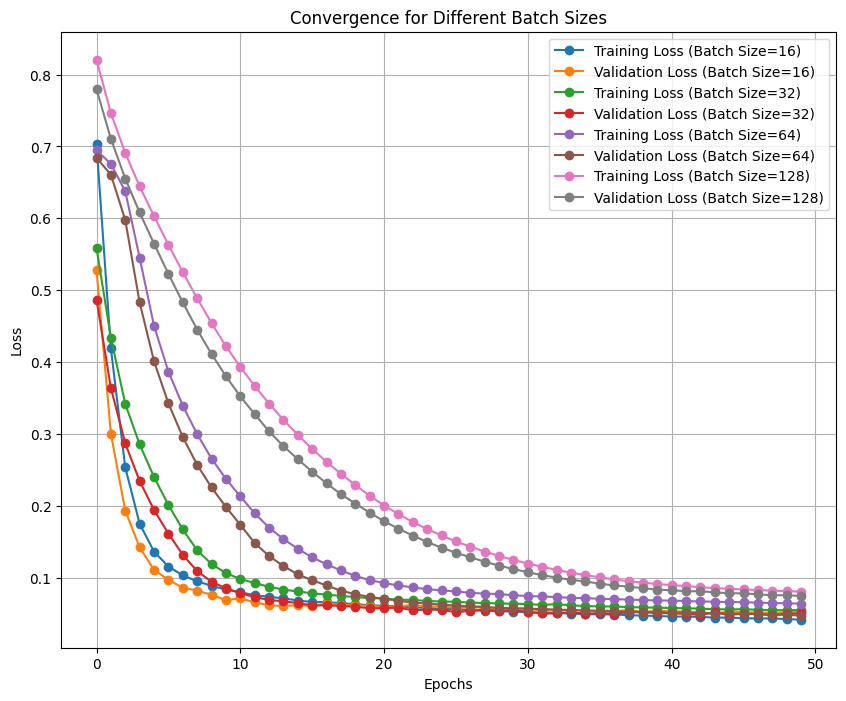

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming X_train and X_test are your training and testing features, and y_train, y_test are labels

# Number of features
num_features = X_train.shape[1]

# List of batch sizes to experiment with
batch_sizes = [16, 32, 64, 128]

# Create empty lists to store accuracy and r2 score for each batch size
accuracies = []
r2_scores = []
test_accuracies = [] 
training_histories = []

# Loop through each batch size
for batch_size in batch_sizes:
    # Create the model
    ann = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(num_features,)),  # Input layer with same nodes as num of features
        tf.keras.layers.Dense(units=8, activation='relu'),
        tf.keras.layers.Dense(units=5, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model with the current batch size
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # Train the model and store the training history
    history = ann.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model on test data
    _, accuracy = ann.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Predict and calculate R2 score
    y_pred = ann.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Print accuracy and R2 score for the current batch size
    print(f"Batch Size: {batch_size}")
    print("Accuracy:", accuracy)
    print("R2 Score:", r2)
    print()

    # Store the training history for the current batch size
    training_histories.append(history)

# Plot the convergence for different batch sizes
plt.figure(figsize=(10, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Training Loss (Batch Size={batch_sizes[i]})', marker='o')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (Batch Size={batch_sizes[i]})', marker='o')

plt.title('Convergence for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Best Batch Size = 64

# Experiment 03 - Different Batch Techniques

20/20 [==============================] - 0s 2ms/step
Batching Technique: mini_batch
Accuracy: 0.9810725450515747
R2 Score: 0.937768227565338

20/20 [==============================] - 0s 2ms/step
Batching Technique: stochastic
Accuracy: 0.9810725450515747
R2 Score: 0.9292408725982425

20/20 [==============================] - 0s 1ms/step
Batching Technique: batch_gradient
Accuracy: 0.5457413196563721
R2 Score: 0.06351229204853481



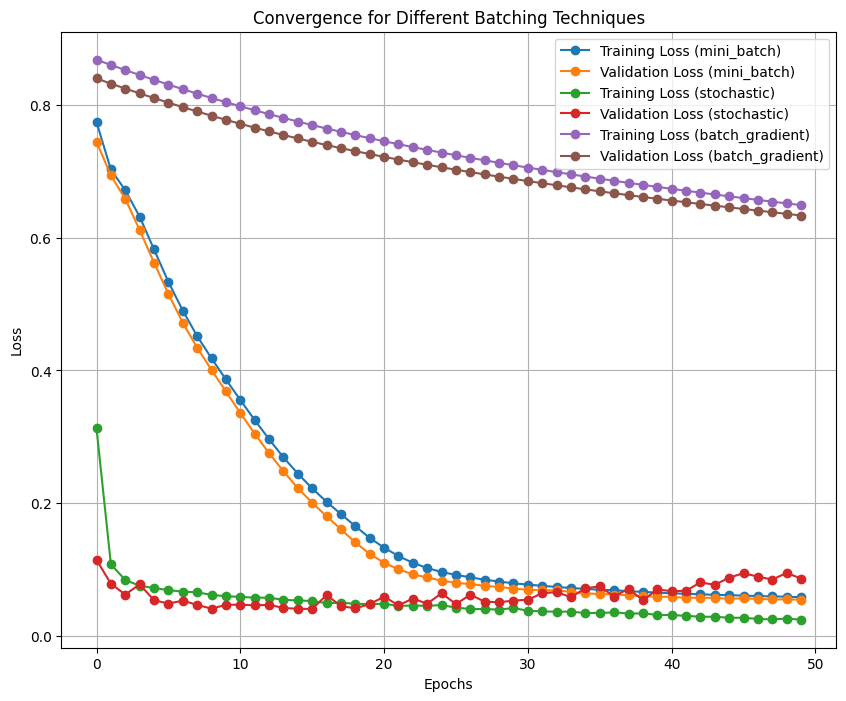

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming X_train and X_test are your training and testing features, and y_train, y_test are labels

# Number of features
num_features = X_train.shape[1]

# List of batching techniques to experiment with
batching_techniques = ['mini_batch', 'stochastic', 'batch_gradient']

# Create empty lists to store accuracy and r2 score for each batching technique
accuracies = []
r2_scores = []
test_accuracies = [] 
training_histories = []



# Loop through each batching technique
for technique in batching_techniques:
    if technique == 'mini_batch':
        batch_size = 64
    elif technique == 'stochastic':
        batch_size = 1
    elif technique == 'batch_gradient':
        batch_size = len(X_train)

    # Create the model
    ann = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(num_features,)),  # Input layer with same nodes as num of features
        tf.keras.layers.Dense(units=8, activation='relu'),
        tf.keras.layers.Dense(units=5, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # Train the model and store the training history
    history = ann.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model on test data
    _, accuracy = ann.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Predict and calculate R2 score
    y_pred = ann.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Print accuracy and R2 score for the current batching technique
    print(f"Batching Technique: {technique}")
    print("Accuracy:", accuracy)
    print("R2 Score:", r2)
    print()

    # Store the training history for the current batching technique
    training_histories.append(history)

# Plot the convergence for different batching techniques
plt.figure(figsize=(10, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Training Loss ({batching_techniques[i]})', marker='o')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({batching_techniques[i]})', marker='o')

plt.title('Convergence for Different Batching Techniques')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Best Technique - Mini Batch

# Experiment 04 - Different Loss Functions

20/20 [==============================] - 0s 3ms/step
Loss Function: binary_crossentropy
Accuracy: 0.9779179692268372
R2 Score: 0.9268816086202156

20/20 [==============================] - 0s 2ms/step
Loss Function: mean_squared_error
Accuracy: 0.9763407111167908
R2 Score: 0.922555972912024



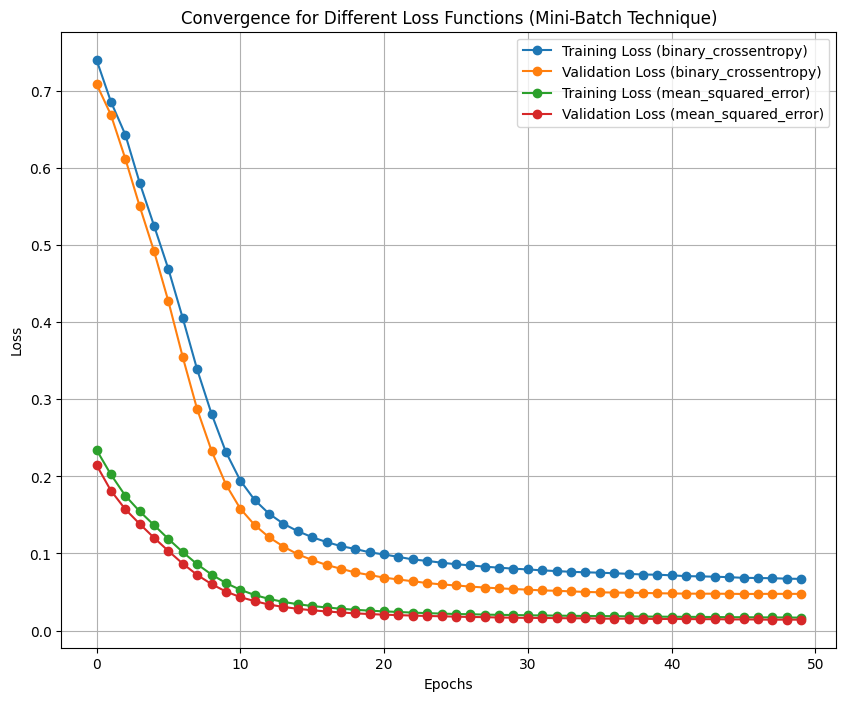

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming X_train and X_test are your training and testing features, and y_train, y_test are labels

# Number of features
num_features = X_train.shape[1]

# List of loss functions to experiment with
loss_functions = ['binary_crossentropy', 'mean_squared_error']

# Selecting the mini-batch technique
batch_size = 64

# Create empty lists to store accuracy and r2 score for each loss function
accuracies = []
r2_scores = []
training_histories = []

# Loop through each loss function
for loss_function in loss_functions:
    # Create the model
    ann = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(num_features,)),  # Input layer with same nodes as num of features
        tf.keras.layers.Dense(units=8, activation='relu'),
        tf.keras.layers.Dense(units=5, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model with the current loss function
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=loss_function,
                metrics=['accuracy'])

    # Train the model and store the training history
    history = ann.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model on test data
    _, accuracy = ann.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Predict and calculate R2 score
    y_pred = ann.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Print accuracy and R2 score for the current loss function
    print(f"Loss Function: {loss_function}")
    print("Accuracy:", accuracy)
    print("R2 Score:", r2)
    print()

    # Store the training history for the current loss function
    training_histories.append(history)

# Plot the convergence for different loss functions
plt.figure(figsize=(10, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Training Loss ({loss_functions[i]})', marker='o')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({loss_functions[i]})', marker='o')

plt.title('Convergence for Different Loss Functions (Mini-Batch Technique)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Best Loss function - Binary Cross Entropy

# Experiment 05 - Different Activation Function

20/20 [==============================] - 0s 2ms/step
Activation Function: relu
Accuracy: 0.9826498627662659
R2 Score: 0.9375095910959016

20/20 [==============================] - 0s 2ms/step
Activation Function: tanh
Accuracy: 0.9794952869415283
R2 Score: 0.9281321839242317

20/20 [==============================] - 0s 3ms/step
Activation Function: sigmoid
Accuracy: 0.9779179692268372
R2 Score: 0.9249170350306145



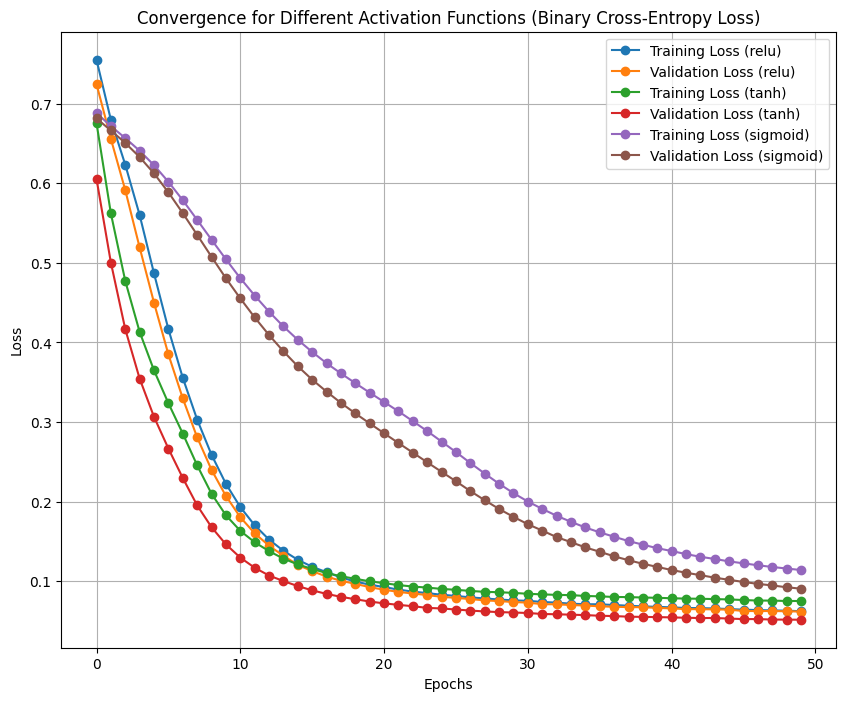

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming X_train and X_test are your training and testing features, and y_train, y_test are labels

# Number of features
num_features = X_train.shape[1]

# List of activation functions to experiment with
activation_functions = ['relu', 'tanh', 'sigmoid']

# Selecting the mini-batch technique
batch_size = 64

# Create empty lists to store accuracy and r2 score for each activation function
accuracies = []
r2_scores = []
training_histories = []

# Loop through each activation function
for activation_function in activation_functions:
    # Create the model with the current activation function
    ann = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(num_features,)),  # Input layer with same nodes as num of features
        tf.keras.layers.Dense(units=8, activation=activation_function),
        tf.keras.layers.Dense(units=5, activation=activation_function),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model with binary cross-entropy loss and Adam optimizer
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

    # Train the model and store the training history
    history = ann.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Evaluate the model on test data
    _, accuracy = ann.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Predict and calculate R2 score
    y_pred = ann.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Print accuracy and R2 score for the current activation function
    print(f"Activation Function: {activation_function}")
    print("Accuracy:", accuracy)
    print("R2 Score:", r2)
    print()

    # Store the training history for the current activation function
    training_histories.append(history)

# Plot the convergence for different activation functions
plt.figure(figsize=(10, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Training Loss ({activation_functions[i]})', marker='o')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({activation_functions[i]})', marker='o')

plt.title('Convergence for Different Activation Functions (Binary Cross-Entropy Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Best activation Function - Relu